# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech

- Nama: Farah Putri Firdausa
- Email: farahslearn@gmail.com
- Id Dicoding: farahputri

## Persiapan

### Menyiapkan library yang dibutuhkan

In [23]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

### Menyiapkan data yang akan digunakan

In [24]:
#Load Data 
df = pd.read_csv('data.csv', delimiter=';')
df.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


## Data Understanding

In [25]:
# Cek Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [26]:
# Cek Missing Value 
df.isnull().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [27]:
# Cek Duplicate Data
df.duplicated().sum()

0

## Data Preparation / Preprocessing

### Data Cleaning & Consistency Check
Sesuai tujuan bisnis untuk deteksi dini (Binary Classification), kita akan membuang data dengan status **'Enrolled'**.
Langkah ini juga dilakukan untuk menjaga **konsistensi** dengan Dashboard Monitoring yang hanya berfokus pada perbandingan tegas antara mahasiswa yang Lulus (*Graduate*) vs Gagal (*Dropout*).

In [28]:
# Feature Selection
selected_features = [
    'Tuition_fees_up_to_date',
    'Scholarship_holder',
    'Curricular_units_1st_sem_grade',
    'Curricular_units_2nd_sem_grade',
    'Age_at_enrollment',
    'Debtor',
    'Gender'
]

In [29]:
# Filter Data
df_clean = df[df['Status'] != 'Enrolled'].copy()

In [30]:
# Encoding Target
status_mapping = {'Dropout':1, 'Graduate':0}
df_clean['Status_Encoded'] = df_clean['Status'].map(status_mapping)

In [31]:
df.to_csv('dashboard_data.csv', index=False)
print("File 'dashboard_data.csv' siap di-upload!")

File 'dashboard_data.csv' siap di-upload!


In [32]:
# Definisi (X) dan Target (y)
X = df_clean[selected_features]
y = df_clean['Status_Encoded']

In [33]:
# Membagi Data Latih dan Data Uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
# Cek Hasil Pembagian Data
print("Hasil Data Preparation")
print(f"Total Data Bersih: {len(df_clean)}")
print(f"Jumlah Data Latihan (Training): {len(X_train)}")
print(f"Jumlah Data Ujian (Testing): {len(X_test)}")

Hasil Data Preparation
Total Data Bersih: 3630
Jumlah Data Latihan (Training): 2904
Jumlah Data Ujian (Testing): 726


## Exploratory Data Analysis (EDA)

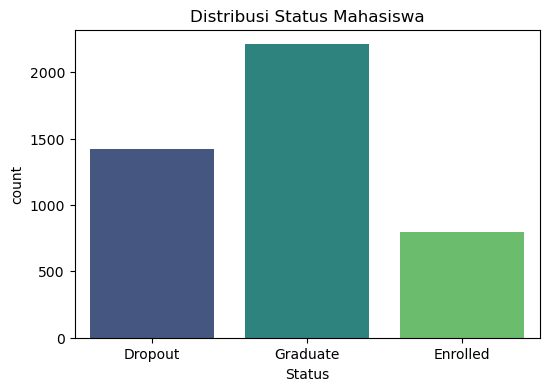

In [35]:
# 1. Univariate Analysis (Distribusi Status)
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Status', palette='viridis')
plt.title('Distribusi Status Mahasiswa')
plt.show()

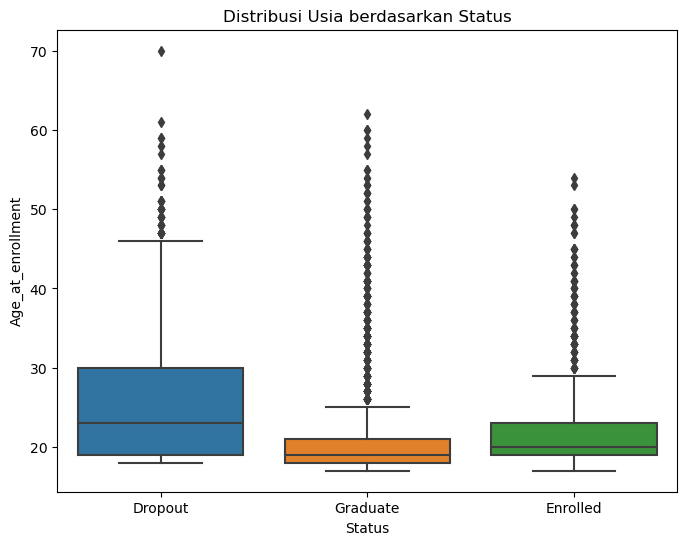

In [36]:
# 2. Multivariate Analysis (Hubungan Usia vs Status)
plt.figure(figsize=(8,6))
sns.boxplot(x='Status', y='Age_at_enrollment', data=df)
plt.title('Distribusi Usia berdasarkan Status')
plt.show()

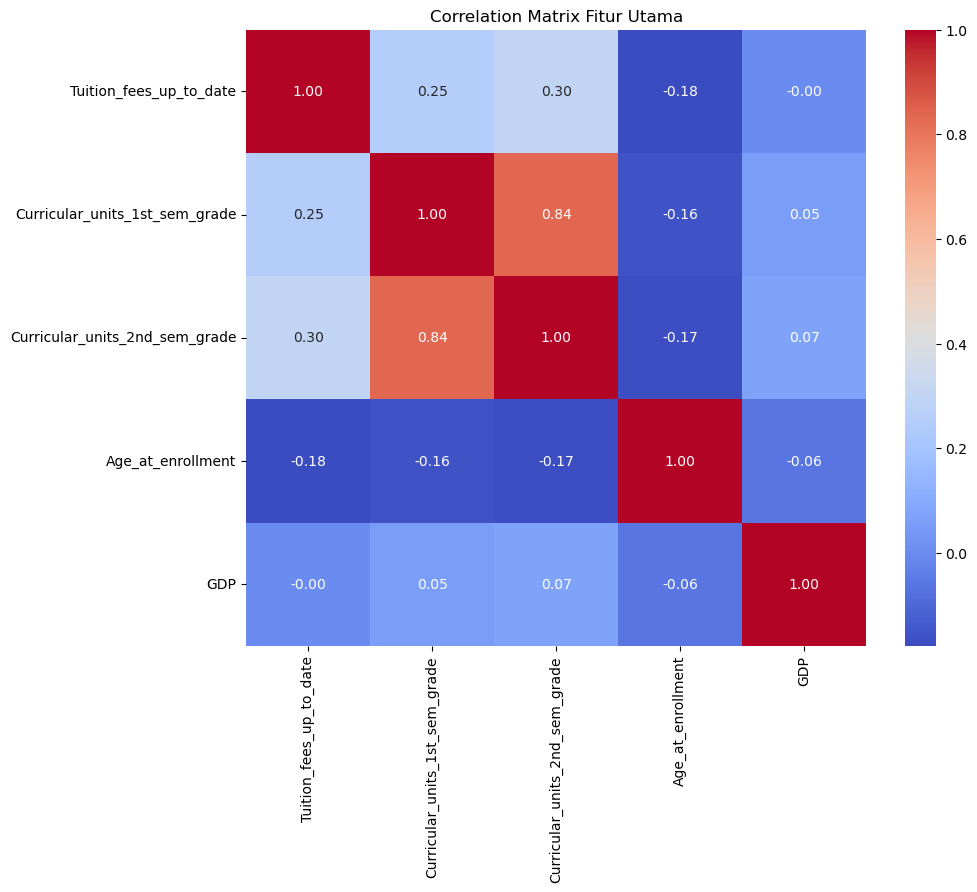

In [37]:
# 3. Correlation Matrix (Heatmap)
plt.figure(figsize=(10,8))
corr_matrix = df[['Tuition_fees_up_to_date', 'Curricular_units_1st_sem_grade', 
                  'Curricular_units_2nd_sem_grade', 'Age_at_enrollment', 'GDP']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Fitur Utama')
plt.show()

## Modeling

In [38]:
# Melatih Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
import joblib
joblib.dump(model, 'model.pkl')
print("Model berhasil dilatih ulang dengan 7 fitur spesifik.")

Model berhasil dilatih ulang dengan 7 fitur spesifik.


## Evaluation

In [40]:
# Evaluasi Hasi;
print("HASIL EVALUASI MODEL")
print(f"Akurasi: {accuracy_score(y_test, y_pred):.2%}")
print("\nLaporan Klasifikasi Lengkap:")
print(classification_report(y_test, y_pred, target_names=['Graduate', 'Dropout']))

HASIL EVALUASI MODEL
Akurasi: 86.50%

Laporan Klasifikasi Lengkap:
              precision    recall  f1-score   support

    Graduate       0.88      0.90      0.89       442
     Dropout       0.83      0.82      0.83       284

    accuracy                           0.87       726
   macro avg       0.86      0.86      0.86       726
weighted avg       0.86      0.87      0.86       726



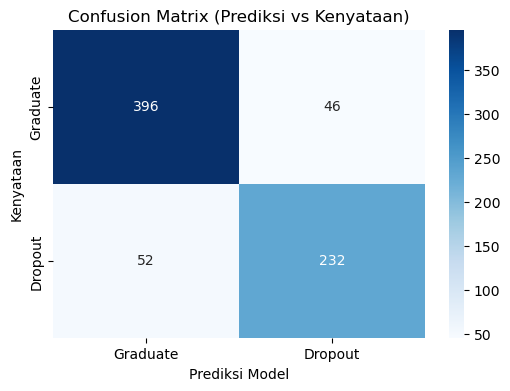

In [41]:
# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Graduate', 'Dropout'],
            yticklabels=['Graduate', 'Dropout'])
plt.title('Confusion Matrix (Prediksi vs Kenyataan)')
plt.ylabel('Kenyataan')
plt.xlabel('Prediksi Model')
plt.show()

In [42]:
# Cek Faktor Penting 
feature_scores = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

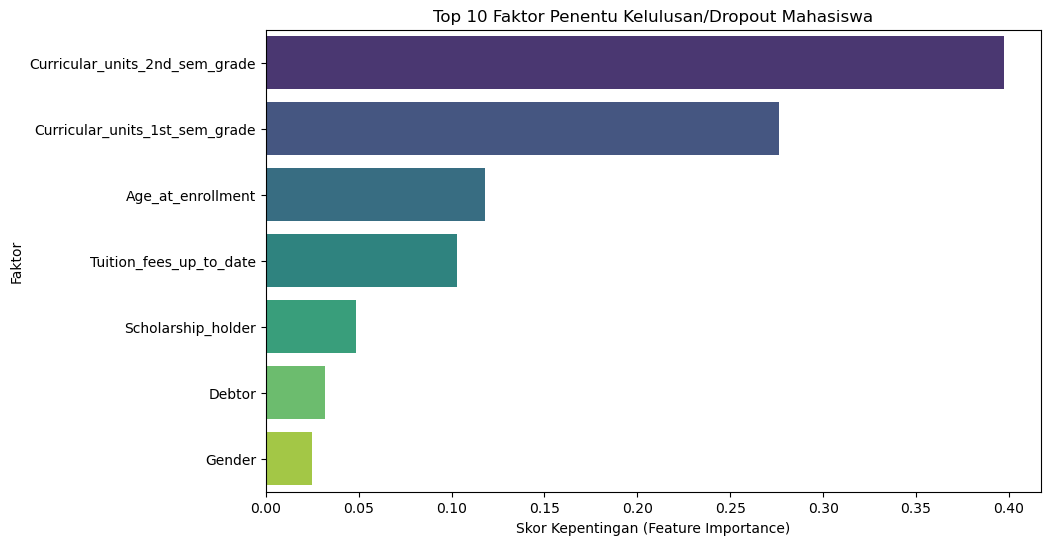

In [43]:
# Visualisasi Top 10 Faktor 
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_scores.head(10), y=feature_scores.head(10).index, palette='viridis')
plt.title('Top 10 Faktor Penentu Kelulusan/Dropout Mahasiswa')
plt.xlabel('Skor Kepentingan (Feature Importance)')
plt.ylabel('Faktor')
plt.show()

## Kesimpulan & Rekomendasi (Action Items)

Berdasarkan analisis data dan model machine learning yang telah dibangun, ditemukan bahwa faktor utama yang mempengaruhi seorang mahasiswa melakukan Dropout adalah **Status Pembayaran SPP (Tuition Fees)** dan **Nilai Akademik Semester 1**.

**Insight:**
- Mahasiswa yang menunggak pembayaran SPP memiliki risiko dropout yang sangat tinggi (di atas 80%).
- Mahasiswa dengan IPK rendah di semester awal cenderung gagal menyelesaikan studi.

**Rekomendasi Bisnis (Action Items) untuk Jaya Jaya Institut:**
1.  **Early Warning System Keuangan:** Kampus perlu membuat notifikasi otomatis atau konseling keuangan bagi mahasiswa yang terlambat membayar SPP di bulan pertama perkuliahan.
2.  **Program Mentoring Akademik:** Mahasiswa dengan nilai rendah di Semester 1 wajib mengikuti kelas tambahan atau mentoring sebaya sebelum masuk ke Semester 2.
3.  **Penerapan Model Prediksi:** Mengintegrasikan model Machine Learning ini ke sistem akademik dosen wali untuk memantau status risiko setiap mahasiswa per semester.

In [44]:
# Menyimpan model ke file 'model.pkl'
joblib.dump(model, 'model.pkl')
print("Model berhasil disimpan sebagai 'model.pkl'!")

Model berhasil disimpan sebagai 'model.pkl'!
